<a href="https://colab.research.google.com/github/Sukanya41455/Hand-on-ML/blob/main/Chapter_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris() #target names = ['setosa', 'versicolor', 'virginica'], cols= ["sepal length","sepal width", "petal length","petal width"]
print(iris)
X = iris.data[:,(2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int16) # iris setosa?

per_clf = Perceptron()
per_clf.fit(X,y)
y_pred1 = per_clf.predict([[2,0.5]])
y_pred2 = per_clf.predict([[1.5,0.2]])
print(y_pred1, y_pred2)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

**BUILDING IMAGE CLASSIFIER USING SEQUENTIAL API**

In [8]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data() 

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [9]:
# to scale the input features
# pixel intensities down to 0-1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Flatten(input_shape=[28,28])) # convert ip image to 1D array
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

'''
or 
model = models.Sequential([
  layers.Flatten(input_shape=[28,28]),
  layers.Dense(300, activation='relu'),
  layers.Dense(100, activation='relu'),
  layers.Dense(10, activation='softmax')
])
'''
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.get_layer('dense_2').name

'dense_2'

In [ ]:
weights, biases = model.get_layer('dense').get_weights()
weights

array([[ 0.05799314, -0.04464902,  0.00663048, ...,  0.07035993,
        -0.07193693, -0.05663535],
       [ 0.05937821, -0.07385354,  0.05954799, ..., -0.07431754,
        -0.06266259, -0.04307606],
       [-0.04358881,  0.06146611,  0.06630094, ..., -0.00113304,
        -0.04659906,  0.03674242],
       ...,
       [-0.03851677, -0.01105423, -0.03553204, ..., -0.03815052,
        -0.05075937, -0.05168839],
       [ 0.00382208,  0.06819524,  0.01625241, ..., -0.00592299,
         0.04773288,  0.00536653],
       [-0.02185261,  0.06967451,  0.04715103, ..., -0.03373491,
         0.0408929 , -0.01283304]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7179 - accuracy: 0.7623 - val_loss: 0.5061 - val_accuracy: 0.8324
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4885 - accuracy: 0.8310 - val_loss: 0.4687 - val_accuracy: 0.8404
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4439 - accuracy: 0.8464 - val_loss: 0.4121 - val_accuracy: 0.8606
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4159 - accuracy: 0.8540 - val_loss: 0.3946 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3947 - accuracy: 0.8614 - val_loss: 0.3866 - val_accuracy: 0.8654
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3780 - accuracy: 0.8680 - val_loss: 0.3683 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3642 - accuracy: 0.8720 - val_loss: 0.3573 - val_accuracy:

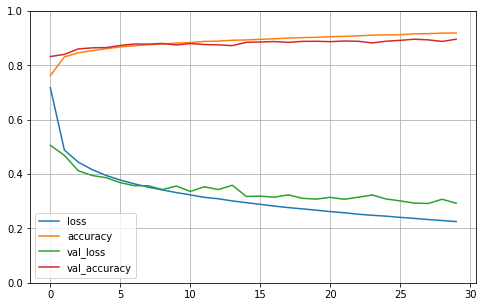

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 68.5278 - accuracy: 0.8383


[68.5278091430664, 0.8382999897003174]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict(X_new)
classes = np.argmax(y_pred,axis=1)
print(classes)
print(np.array(class_names)[classes])
# check
y_new = y_test[:3]
print(y_new)

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
[9 2 1]


**BUILDING A REGRESSION MLP USING SEQUENTIAL API**

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    layers.Dense(1)
])

In [ ]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 2

In [ ]:
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

162/162 [==============================] - 0s 1ms/step - loss: nan
[[nan]
 [nan]
 [nan]]
[3.551 3.55  1.743]


**BUILDING COMPLEX MODELS USING THE FUNCTIONAL API**

In [ ]:
input = layers.Input(shape=X_train.shape[1:])
hidden1 = layers.Dense(30, activation='relu')(input)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.concatenate([input, hidden2])
output = layers.Dense(1)(concat)
model = models.Model(inputs=[input], outputs=[output])

In [ ]:
# multiple inputs
input_A = layers.Input(shape=[5])
input_B = layers.Input(shape=[6])
hidden1 = layers.Dense(30, activation='relu')(input_B)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.concatenate([input_A, hidden2])
output = layers.Dense(1)(concat)
model = models.Model(inputs=[input_A,input_B],outputs=[output])

In [ ]:
model.compile(loss='mse', optimizer='sgd')
X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B),y_valid))

mse_test = model.evaluate((X_test_A, X_test_B),y_test)
y_pred = model.predict((X_new_A, X_new_B))


Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 4

In [ ]:
# multiple outputs
input_A = layers.Input(shape=[5])
input_B = layers.Input(shape=[6])
hidden1 = layers.Dense(30, activation='relu')(input_B)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.concatenate([input_A, hidden2])
output = layers.Dense(1)(concat)
aux_output = layers.Dense(1)(hidden2)
model = models.Model(inputs=[input_A,input_B],outputs=[output, aux_output])

In [ ]:
model.compile(loss=['mse','mse'],loss_weights=[0.9,0.1], optimizer='sgd')

In [ ]:
history = model.fit([X_train_A,X_train_B],[y_train,y_train], epochs=20,
                    validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: nan - dense_29_loss: nan - dense_30_loss: nan - val_loss: nan - val_dense_29_loss: nan - val_dense_30_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: nan - dense_29_loss: nan - dense_30_loss: nan - val_loss: nan - val_dense_29_loss: nan - val_dense_30_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: nan - dense_29_loss: nan - dense_30_loss: nan - val_loss: nan - val_dense_29_loss: nan - val_dense_30_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: nan - dense_29_loss: nan - dense_30_loss: nan - val_loss: nan - val_dense_29_loss: nan - val_dense_30_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: nan - dense_29_loss: nan - dense_30_loss: nan - val_loss: nan - val_dense_29_loss: nan - val_dense_30_loss: nan
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - lo

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A,X_test_B],[y_test,y_test])

162/162 [==============================] - 1s 4ms/step - loss: nan - dense_29_loss: nan - dense_30_loss: nan


In [ ]:
y_pred_main, y_pred_aux = model.predict([X_new_A,X_new_B])

**BUILDING DYNAMIC MODELS USING THE SUBCLASSING API**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

class WideAndDeepModel(keras.Model):
  def __intit__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = layers.Dense(units, activation=activation)
    self.hidden2 = layers.Dense(units, activation=activation)
    self.main_output = layers.Dense(1)
    aux_output = layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()

**SAVING AND RESTORING A MODEL**

In [ ]:
# saves both the architecture and 
# value of all model parameters for every layer
# also saves optimizer, including its hyperparameters and state it may have
model.save("keras_model.h5")
# load
model = keras.models.load_model("keras_model.h5")

**CALLBACKS**

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

In [ ]:
# simple way to implement Early stopping
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model.h5", save_best_only=True)
history = model.fit(X_train,y_train, epochs=10, 
                    validation_data=(X_valid,y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model('keras_model.h5') # rollback to best model

In [ ]:
# another way to implement early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print('\nval/train: {:.2f}'.format(logs['val_loss']/logs['loss']))

**VISUALIZATION USING TENSORBOARD**

In [ ]:
import os
import time

root_logdir = os.path.join(os.curdir, 'my_logs')
def get_run_logdir():
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
# keras provides tensorboard callback
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train,y_train, epochs=100,
                    validation_data=(X_valid,y_valid),
                    callbacks=[tensorboard_cb])


In [ ]:
! tensorboard --logdir=./my_logs --port=6006

**FINETUNING NEURAL NETWORK HYPERPARAMETERS**

In [1]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = models.Sequential()
  options = {"input_shape": input_shape}
  for layer in range(n_hidden):
    model.add(layers.Dense(n_neurons, activation='relu', **options))
    options = {}
  model.add(layers.Dense(1, **options))
  optimizer = keras.optimizers.SGD(learning_rate)
  model.compile(loss='mse', optimizer=optimizer)
  return model

In [5]:
# keras regressor [pip install scikeras]
from scikeras.wrappers import KerasClassifier, KerasRegressor
keras_reg = KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test,y_test)
y_pred = keras_reg(X_new)

In [ ]:
# RANDOMIZED SEARCH
import numpy as np
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid,y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
rnd_search_cv.best_params_
# {'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [ ]:
rnd_search_cv.best_score_
# -0.3189529188278931

In [ ]:
model.rnd_search_cv.best_esmitator_.model